**TASK-2**

**OBJECTIVE - predict the profit for the
corresponding startups through linear regression  single or multi variate)**.

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**DATA COLLECTION AND CLEANING**

In [2]:
df=pd.read_csv(r"D:\MLCOE\task2\regression.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.isnull().sum()

R&D Spend          12
Administration     18
Marketing Spend     0
State               0
Profit              0
dtype: int64

In [4]:
df=df.interpolate()
df

C:\Users\prakh\AppData\Local\Temp\ipykernel_19268\831124899.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df=df.interpolate()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.200000,136897.800000,471784.10,New York,192261.83
1,162597.700000,151377.590000,443898.53,California,191792.06
2,153441.510000,101145.550000,407934.54,Florida,191050.39
3,144372.410000,118671.850000,383199.62,New York,182901.99
4,142107.340000,91391.770000,366168.42,Florida,166187.94
5,131876.900000,99814.710000,362861.36,New York,156991.12
6,134615.460000,147198.870000,127716.82,California,156122.51
7,130298.130000,145530.060000,323876.68,Florida,155752.60
8,120542.520000,148718.950000,311613.29,New York,152211.77
9,123334.880000,108679.170000,304981.62,California,149759.96


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.shape

(50, 5)

In [7]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
df.info

<bound method DataFrame.info of         R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.200000   136897.800000        471784.10    New York  192261.83
1   162597.700000   151377.590000        443898.53  California  191792.06
2   153441.510000   101145.550000        407934.54     Florida  191050.39
3   144372.410000   118671.850000        383199.62    New York  182901.99
4   142107.340000    91391.770000        366168.42     Florida  166187.94
5   131876.900000    99814.710000        362861.36    New York  156991.12
6   134615.460000   147198.870000        127716.82  California  156122.51
7   130298.130000   145530.060000        323876.68     Florida  155752.60
8   120542.520000   148718.950000        311613.29    New York  152211.77
9   123334.880000   108679.170000        304981.62  California  149759.96
10  101913.080000   110594.110000        229160.95     Florida  146121.95
11  100671.960000    91790.610000        249744.55  California  144259.40
12   9

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
df.rename(columns={"Marketing Spend": "Marketing_Spend"},inplace = True)
df.rename(columns={"R&D Spend": "RD_Spend"},inplace = True)
df

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.200000,136897.800000,471784.10,New York,192261.83
1,162597.700000,151377.590000,443898.53,California,191792.06
2,153441.510000,101145.550000,407934.54,Florida,191050.39
3,144372.410000,118671.850000,383199.62,New York,182901.99
4,142107.340000,91391.770000,366168.42,Florida,166187.94
5,131876.900000,99814.710000,362861.36,New York,156991.12
6,134615.460000,147198.870000,127716.82,California,156122.51
7,130298.130000,145530.060000,323876.68,Florida,155752.60
8,120542.520000,148718.950000,311613.29,New York,152211.77
9,123334.880000,108679.170000,304981.62,California,149759.96


In [11]:
df.dtypes

RD_Spend           float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

**EXPLORATORY DATA ANALYSIS**

In [12]:
avg_profit=df.Profit.mean()
avg_RDspend=df.RD_Spend.mean()
avg_spend=df.Marketing_Spend.mean()
print("Average profit : {}".format(avg_profit))
print("Average R&D Spend : {}".format(avg_RDspend))
print("Average Marketing Spend : {}".format(avg_spend))

Average profit : 112012.63920000002
Average R&D Spend : 74076.616
Average Marketing Spend : 211025.09780000002


In [13]:
df.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,74076.616000,129419.045500,211025.097800,112012.639200
std,45360.289591,21233.370447,122290.310726,40306.180338
min,0.000000,51743.150000,0.000000,14681.400000
25%,40420.608125,118731.907500,129300.132500,90138.902500
50%,73051.080000,134020.056250,212716.240000,107978.190000
75%,101602.800000,145035.661071,299469.085000,139765.977500
max,165349.200000,157693.920000,471784.100000,192261.830000


In [14]:
df.groupby(['State'], as_index = False)['Profit'].sum().sort_values(by='Profit', ascending = False)

,State,Profit
2,New York,1933859.59
1,Florida,1900384.39
0,California,1766387.98


<Axes: xlabel='State', ylabel='Profit'>

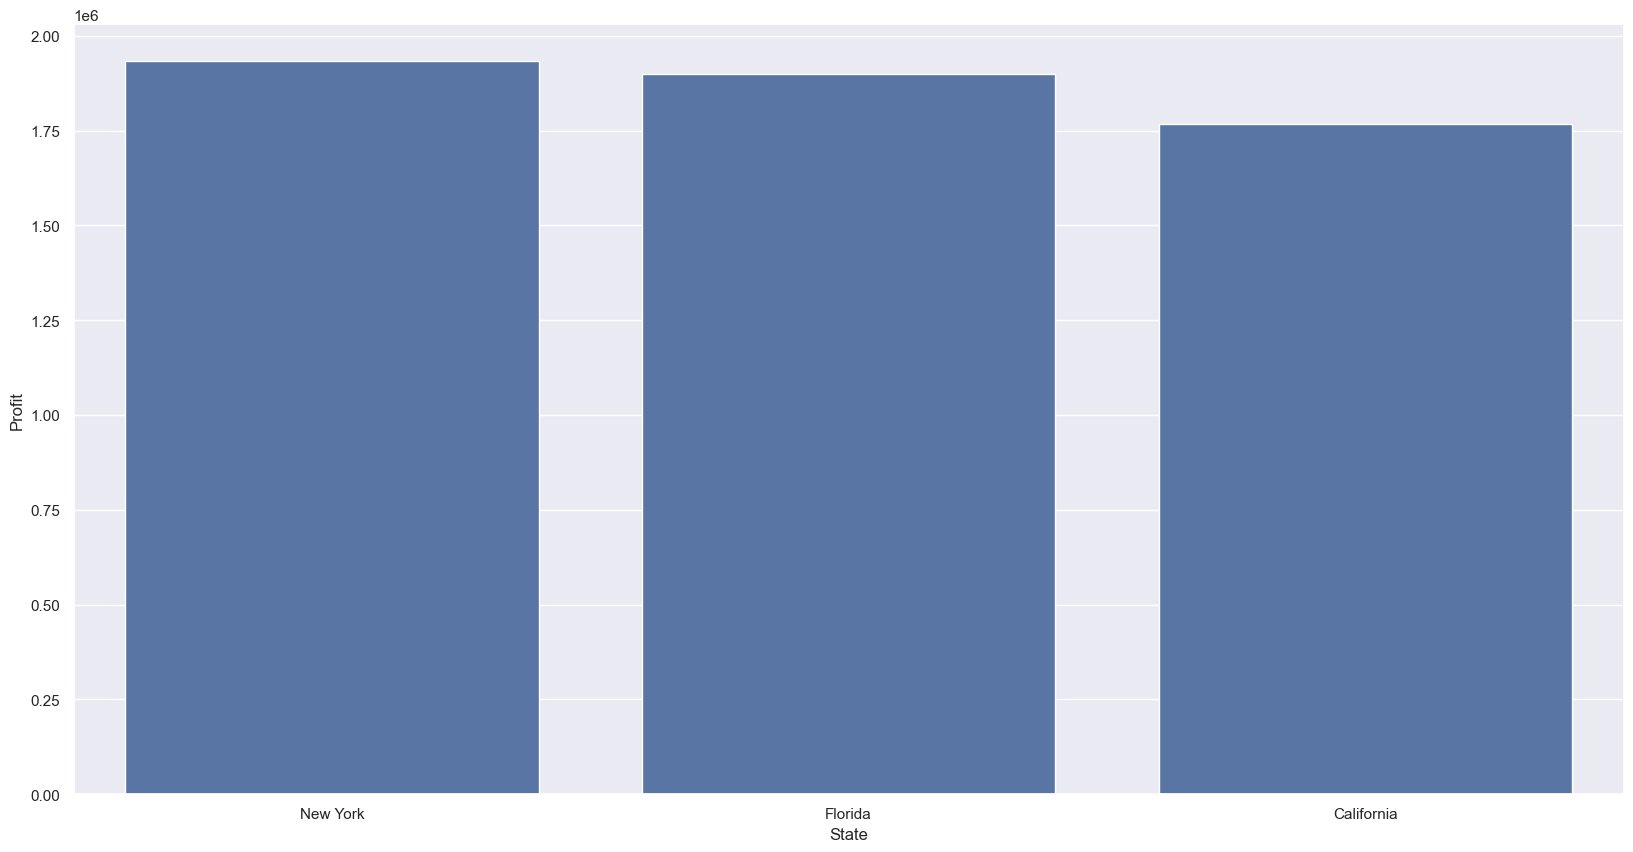

In [15]:
# Plotting barplot
sns.set(rc={'figure.figsize':(20,10)})
profit_state=df.groupby(['State'], as_index = False)['Profit'].sum().sort_values(by='Profit', ascending = False)
sns.barplot(x = 'State' , y ='Profit' ,data=profit_state)

**FROM THIS GRAPH WE CAN CONCLUDE THAT NEWYORK IS GENERATING MORE PROFIT IN COMPARISION OF OTHER TWO STATES**

<Axes: xlabel='Marketing_Spend', ylabel='Profit'>

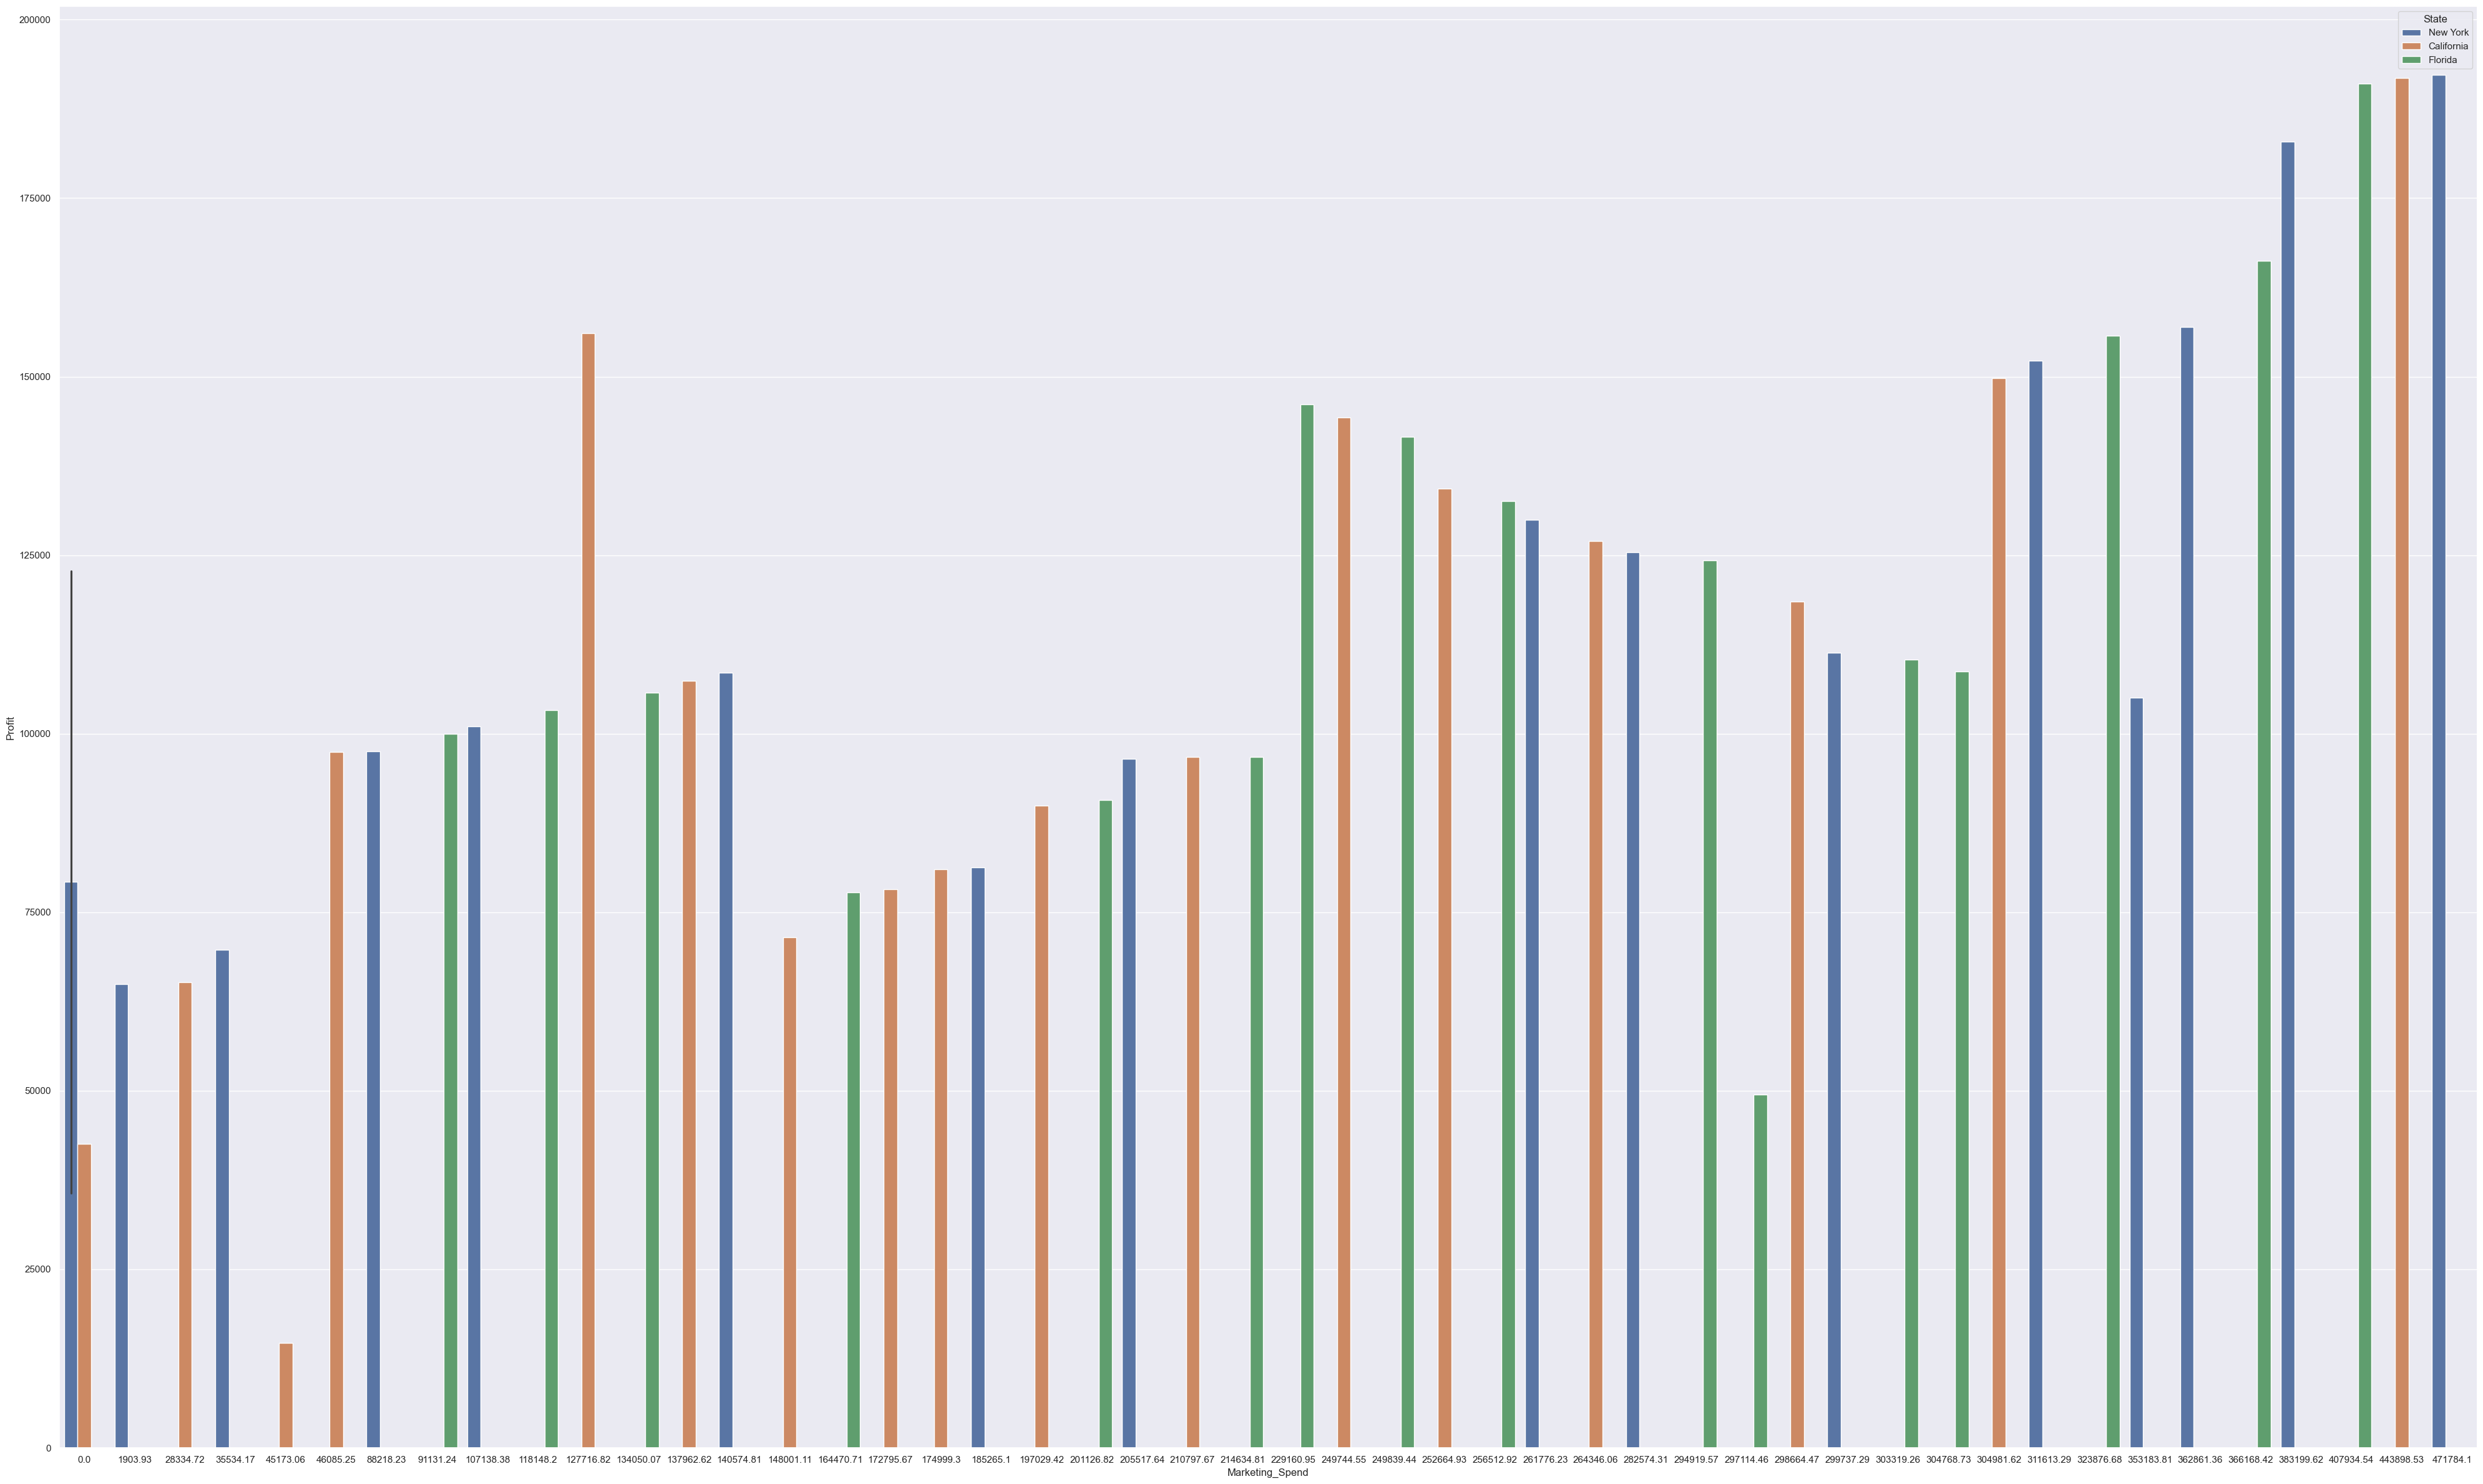

In [16]:
sns.set(rc={'figure.figsize':(50,30)})

sns.barplot(data=df, x= 'Marketing_Spend' , y='Profit' , hue = 'State')

**Above Graph is showing that which country between newyork california and florida Spent money in the marketing in the most and how much money they generate from that marketing spent.**

<Axes: xlabel='Marketing_Spend', ylabel='Density'>

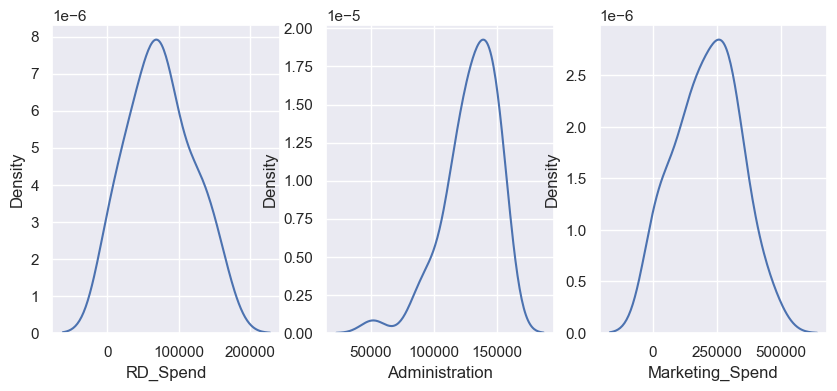

In [17]:
fig, axes = plt.subplots(1,3, figsize = (10,4))


sns.set_style('darkgrid')
sns.kdeplot(x = 'RD_Spend', data = df , ax=axes[0])


sns.kdeplot(x = 'Administration', data = df , ax=axes[1])

sns.kdeplot(x = 'Marketing_Spend', data = df , ax=axes[2])

In [18]:
df['Administration'].skew()

-1.298959528916

**According to above graph , R&D Spend and Marketing Spend is almost Normal but in Administration outliers are present**

In [19]:
#Finding the IQR
percentile25= df['Administration'].quantile(0.25)
percentile75= df['Administration'].quantile(0.75)

In [20]:
#IQR

iqr = percentile75 -percentile25
iqr

26303.753571428562

In [21]:
upper_limit= percentile75 + 1.5*iqr
lower_limit= percentile25 - 1.5*iqr
print("Upper Limit" , upper_limit)
print("Lower Limit",lower_limit)

Upper Limit 184491.2914285714
Lower Limit 79276.27714285716


**FINDING OF OUTLIER**

In [22]:
(df[df['Administration'] >upper_limit]) | (df[df['Administration'] <lower_limit])

,RD_Spend,Administration,Marketing_Spend,State,Profit
48,False,False,False,False,False


**SOLVING OUTLIERS PROBLEM**

In [23]:
new_df = df.copy()

new_df['Administration'] = np.where(
        df['Administration'] > upper_limit,
        upper_limit,
        np.where(
            df['Administration'] < lower_limit,
            lower_limit,
            df['Administration']))

In [24]:
df['Administration'].describe()

count        50.000000
mean     129419.045500
std       21233.370447
min       51743.150000
25%      118731.907500
50%      134020.056250
75%      145035.661071
max      157693.920000
Name: Administration, dtype: float64

In [25]:
new_df

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.200000,136897.800000,471784.10,New York,192261.83
1,162597.700000,151377.590000,443898.53,California,191792.06
2,153441.510000,101145.550000,407934.54,Florida,191050.39
3,144372.410000,118671.850000,383199.62,New York,182901.99
4,142107.340000,91391.770000,366168.42,Florida,166187.94
5,131876.900000,99814.710000,362861.36,New York,156991.12
6,134615.460000,147198.870000,127716.82,California,156122.51
7,130298.130000,145530.060000,323876.68,Florida,155752.60
8,120542.520000,148718.950000,311613.29,New York,152211.77
9,123334.880000,108679.170000,304981.62,California,149759.96


**TRAIN TEST SPLIT**

In [26]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    new_df.RD_Spend,new_df.Profit ,test_size=0.30, random_state=42)

Text(0.5, 1.0, 'Test Train Split')

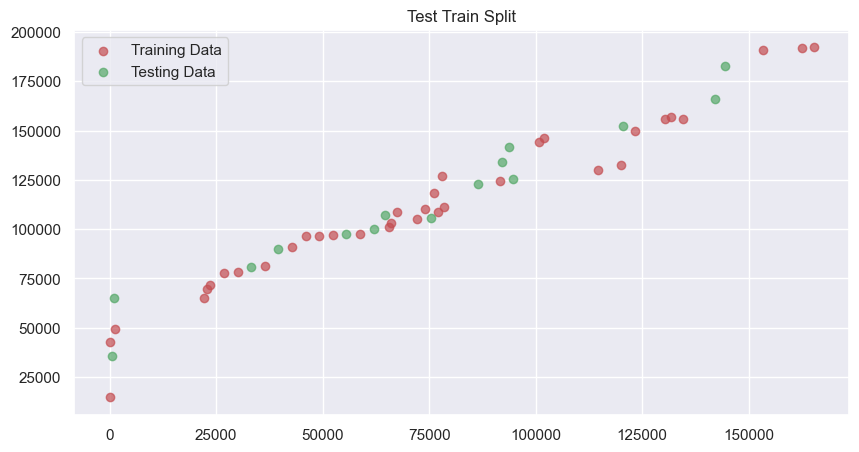

In [27]:
sns.set(rc={'figure.figsize':(10,5
                             )})

plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=.7)
plt.scatter(X_test,y_test,label='Testing Data',color='g',alpha=.7)
plt.legend()
plt.title("Test Train Split")

**IMPLEMENTING LINEAR REGRESSION**

In [28]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

regression.fit(X_train.values.reshape(-1,1),y_train.values)

LinearRegression()

In [29]:
#Use model to predict on Test data
y_prediction = regression.predict(X_test.values.reshape(-1,1))

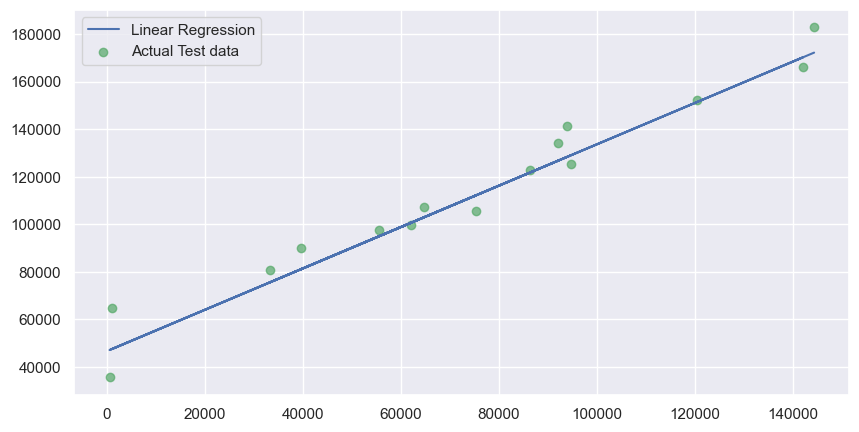

In [30]:
#plot Prediction line against actual test data

plt.plot(X_test,y_prediction,label='Linear Regression',color='b')
plt.scatter(X_test,y_test,label='Actual Test data',color='g',alpha=.7)
plt.legend()

In [31]:
# Predict Profit if R&D Spend is 23000

regression.predict(np.array([[23000]]))[0]

66677.38525348305

In [32]:
y_prediction

array([126689.52311481,  75575.22474038, 100596.22919541,  47541.16993818,
       129007.43882419,  47142.62799282, 112194.97582496, 102918.89421516,
        95036.00598318, 121842.19081427, 128317.30140033, 170281.36401659,
        81135.44795261, 151523.48433167, 172251.60585204])

In [33]:
# Score this model

regression.score(X_test.values.reshape(-1,1),y_test.values)

0.9531953268863746